<a href="https://colab.research.google.com/github/SlmP1/Customer-Segmentation-Clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ინფორმაციის წამოღება და დამუშავება


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
df = pd.read_csv('data.csv')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.duplicated().sum()

0

In [ ]:
#დატაფრეიმის აღწერით ვნახეთ, რომ ინქამის ველში გვაქვს 24 ნალ ველიუ,(მთელი მონაცემების 1%) ნალ ველიუებისთვის მქონდა ორი ვარიანტი
#ან დადროფვა ან საშუალოთი ჩანაცვლება რადგან ნალ ველიუს შემცველი როუების რაოდენობა არამატერიალური იყო გადავწყვიტე დამედროფა ასეთი როუები
#რომ საშუალოთი ჩანაცვლებას რაიმე ზემოქმედება არ მოეხდინა კლასტერიზაციაზე
# df['Income'] = df['Income'].fillna(df['Income'].mean())
null_counts = df.isnull().sum()
df.dropna(inplace = True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000  

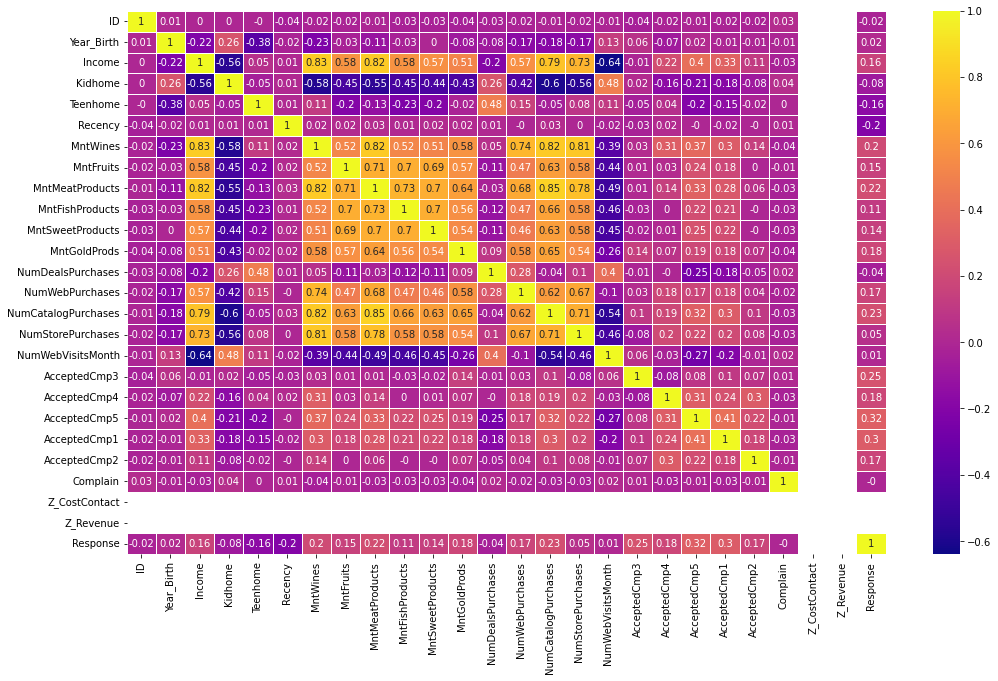

In [ ]:
# Correlation matrix
%matplotlib inline
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="plasma")
plt.show()

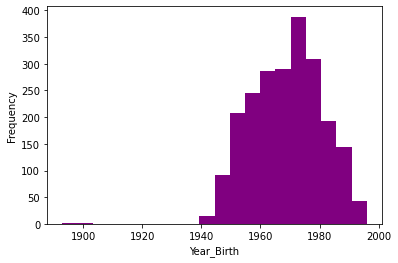

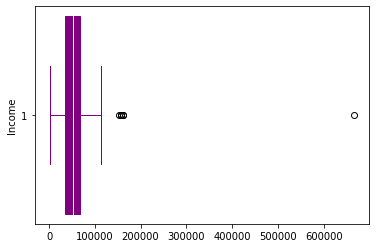

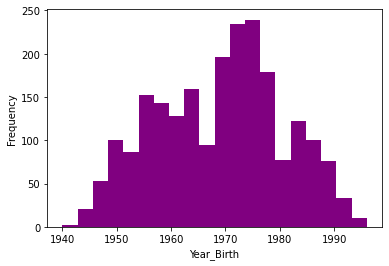

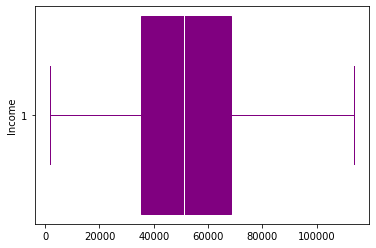

In [ ]:
#გაბნევის დიაპაზონი იყო 100 წელი და მინდოდა რომ 5–5 წლიანი შუალედები მქონოდა და ამიტომ 20 ბინი გავაკეთე
def hist_age():
  plt.hist(df['Year_Birth'], bins=20, color='purple')
  plt.xlabel('Year_Birth')
  plt.ylabel('Frequency')
  plt.show()

def box_income():
  plt.boxplot(df['Income'], vert=False, widths=2.5, patch_artist=True, boxprops=dict(facecolor='purple', color='purple'), medianprops=dict(color='white'), whiskerprops=dict(color='purple'), capprops=dict(color='purple'))
  plt.ylabel('Income')
  plt.show()

hist_age()
box_income()

# ვნახე რომ აუთლაიერები იყვნენ, და გადავწყვიტე რომ მომეშორებინა
df = df[(np.abs(stats.zscore(df['Income']) ) < 3)]
df = df[(np.abs(stats.zscore(df['Year_Birth']) ) < 3)]

hist_age()
box_income()

In [ ]:
df['Marital_Status'].value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Text(0, 0.5, '')

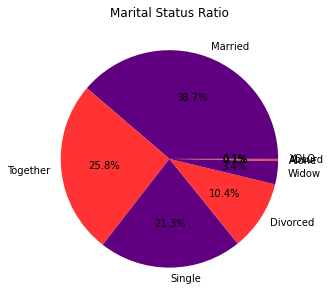

In [ ]:
fig = plt.figure(figsize=(5, 5))
marital_counts = df['Marital_Status'].value_counts()
marital_counts.plot(kind='pie', autopct='%1.1f%%',colors=['#600080', '#ff3333'])

plt.title('Marital Status Ratio')
plt.ylabel('')

In [ ]:
derived_df_1 = df.copy(deep = True)
derived_df_1['Basic'] = df['MntMeatProducts'] + df['MntFishProducts'] + df['MntFruits']
derived_df_1['Average'] = df['MntWines'] + df['MntSweetProducts']
derived_df_1['Luxury'] = df['MntGoldProds']
columns_to_drop = ['MntMeatProducts', 'MntFishProducts', 'MntFruits','MntWines','MntSweetProducts','MntGoldProds']
derived_df_1 = derived_df_1.drop(columns_to_drop, axis=1)

derived_df_1['Children'] = df['Kidhome'] + df['Teenhome']
derived_df_1['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
derived_df_1['Marital_Status'] = derived_df_1['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
derived_df_1['Marital_Status'] = derived_df_1['Marital_Status'].replace({'relationship': 1, 'Single': 0})
derived_df_1 = derived_df_1.drop(['Kidhome', 'Teenhome'], axis=1)

derived_df_1['Age'] = dt.datetime.now().year - df["Year_Birth"]

derived_df_1['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
derived_df_1['Days'] = (pd.Timestamp.today() - derived_df_1['Dt_Customer']).dt.days
derived_df_1 = derived_df_1.drop(['Dt_Customer'], axis=1)

<Figure size 720x360 with 0 Axes>

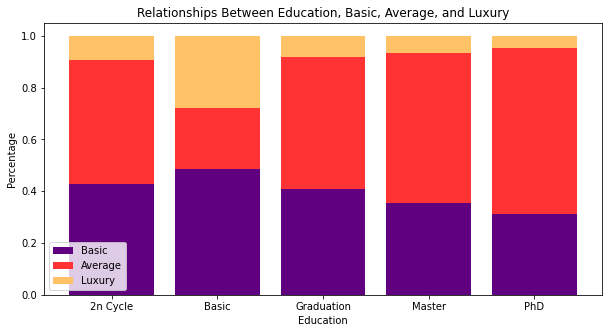

In [ ]:
tmp = derived_df_1.groupby('Education').sum().reset_index()
fig = plt.figure(figsize=(10, 5))

total = tmp['Basic'] + tmp['Average'] + tmp['Luxury']
basic_perc = tmp['Basic'] / total
avg_perc = tmp['Average'] / total
lux_perc = tmp['Luxury'] / total

fig = plt.figure(figsize=(10, 5))
plt.bar(tmp['Education'], basic_perc, color='#600080', label='Basic')
plt.bar(tmp['Education'], avg_perc, bottom=basic_perc, color='#ff3333', label='Average')
plt.bar(tmp['Education'], lux_perc, bottom=basic_perc+avg_perc, color='#ffc266', label='Luxury')

plt.title('Relationships Between Education, Basic, Average, and Luxury')
plt.xlabel('Education')
plt.ylabel('Percentage')

plt.legend()

derived_df_1[['Education']] = df[['Education']].apply(lambda x: pd.factorize(x)[0])
#აქედან გამომდინარე შეგვიძლია ვივარაუდოთ, რომ განათლების მაღალ საფეხურთან ერთად იზრდება average პროდუქტების წილი ჯამურ დანახარჯებში

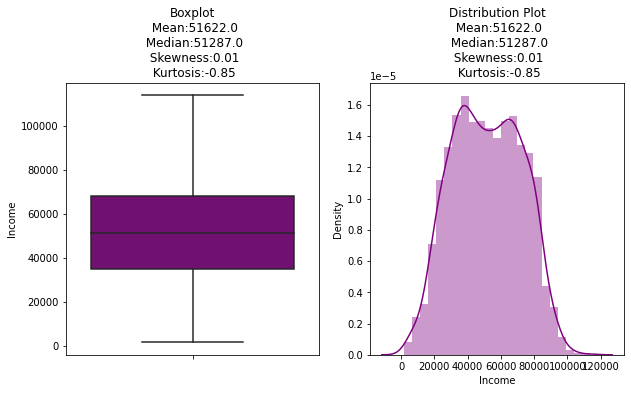

In [ ]:
plt.figure(figsize=(10,5))

skewness = round(df.Income.skew(),2)
kurtosis = round(df.Income.kurtosis(),2)
mean = round(np.mean(df.Income),0)
median = np.median(df.Income)

plt.subplot(1,2,1)
sns.boxplot(y=df.Income, color='purple')
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(df.Income, color='purple')
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

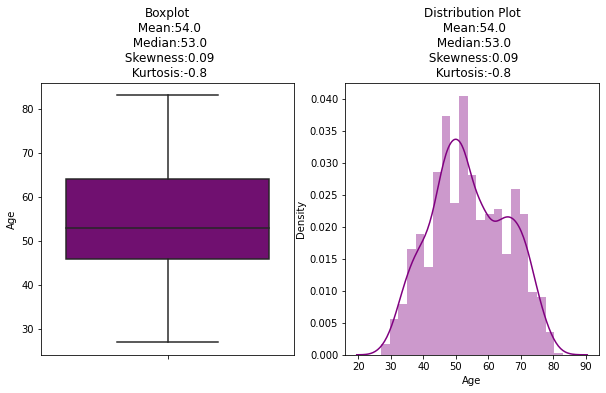

In [ ]:
plt.figure(figsize=(10,5))

skewness = round(derived_df_1.Age.skew(),2)
kurtosis = round(derived_df_1.Age.kurtosis(),2)
mean = round(np.mean(derived_df_1.Age),0)
median = np.median(derived_df_1.Age)

plt.subplot(1,2,1)
sns.boxplot(y=derived_df_1.Age, color='purple')
plt.title('Boxplot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.subplot(1,2,2)
sns.distplot(derived_df_1.Age, color='purple')
plt.title('Distribution Plot\n Mean:{}\n Median:{}\n Skewness:{}\n Kurtosis:{}'.format(mean,median,skewness,kurtosis))

plt.show()

In [ ]:
scaler=StandardScaler()
derived_df_1[['Age','Income','Days','Children','Recency','Basic','Average','Luxury','Z_CostContact','Z_Revenue']]=scaler.fit_transform(derived_df_1[['Age','Income','Days','Children','Recency','Basic','Average','Luxury','Z_CostContact','Z_Revenue']])

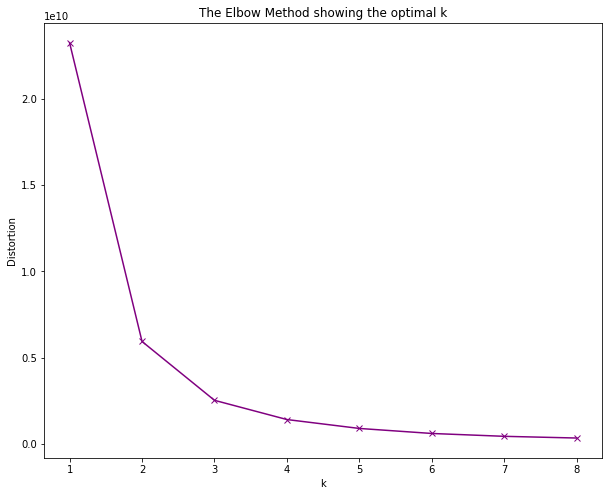

In [ ]:
# გამოვიყენოთ კმინსი. მოდელის კონსტრუქტორში ისეთ პარამეტს არ ვიყენებ რომელიც ახსნას საჭიროებს. კ-ს რეინჯს ნოლიდან 10ს
# ჩათვლით ვუშვებ. ყველაზე კარგი inertia ჩემი აზრით 3ზე აქვს. რეინჯის გაზრდით inertia უმჯობესდება და გამოთვლითი დრო იმატებს, იმდენად რომ ეს მცირე გაუმჯობესება უგუვებელვყავი.
# ანუ k-ს მშიშვნელობა 3 ავიღე
distortions = []
K = range(1,9)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(derived_df_1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-', color='purple')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,max_iter=300,n_init=len(df))
kmeans.fit(derived_df_1)

KMeans(n_clusters=3, n_init=2205)

In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
kmeansDataFrame = df.copy()

In [ ]:
kmeansDataFrame['clusters'] = kmeans.labels_
kmeansDataFrame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,2
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,0,0,0,1,0,0,3,11,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,2


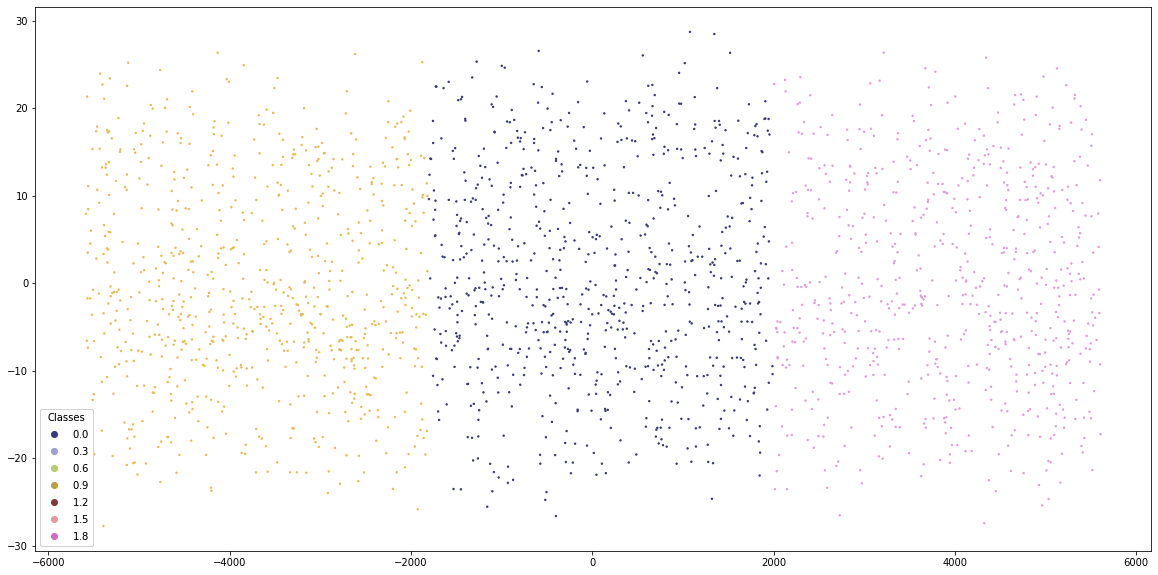

In [ ]:
#PCA გამოვეყონოთ მიღებული კლასტერების ვიზუალურად სანახავად 2დში
X1 = derived_df_1
y1 = kmeansDataFrame['clusters']

pca = decomposition.PCA(n_components=2)
pca.fit(X1)
X_pca = pca.transform(X1)
embedding = X_pca
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=y1, cmap='tab20b', alpha=1.0)

legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

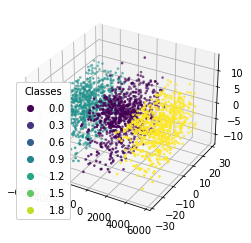

In [ ]:

#PCA გამოვეყონოთ მიღებული კლასტერების ვიზუალურად სანახავად 3დში
X1 = derived_df_1.to_numpy()
y1 = kmeansDataFrame['clusters'].to_numpy()


pca = decomposition.PCA(n_components=3)
pca.fit(X1)
X_pca = pca.transform(X1)
embedding = X_pca


fig = plt.figure()
ax = plt.axes(projection ='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=3, c=y1)

legend1 = ax.legend(*scatter.legend_elements(num=7),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

მოდელის აგებამდე ვცადე PCAს გამოყენება მაგრამ გაუმჯობესება არ მქონია მნიშვნელოვანი,
ამიტომ PCAს მხოლოდ ვიზუალიზაციისთვის გამოვიყენებ

In [ ]:
df = pd.concat([df, kmeansDataFrame['clusters']], axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,0,0,0,0,0,0,3,11,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,0


In [ ]:
df['Age'] = dt.datetime.now().year - df['Year_Birth']

df = df.drop('Year_Birth', axis=1)

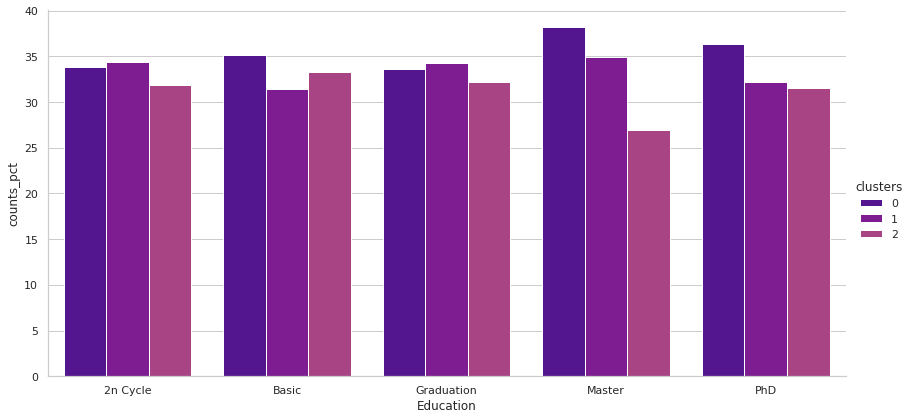

In [ ]:
pivot = df.groupby(['Education', 'clusters']).size().reset_index(name='counts')
pivot['counts_pct'] = pivot.groupby(['Education'])['counts'].apply(lambda x: 100 * x / x.sum())


sns.set(style="whitegrid")
sns.set_palette("plasma")
sns.catplot(x="Education", y="counts_pct", hue="clusters", kind="bar", data=pivot, height=6, aspect=2)

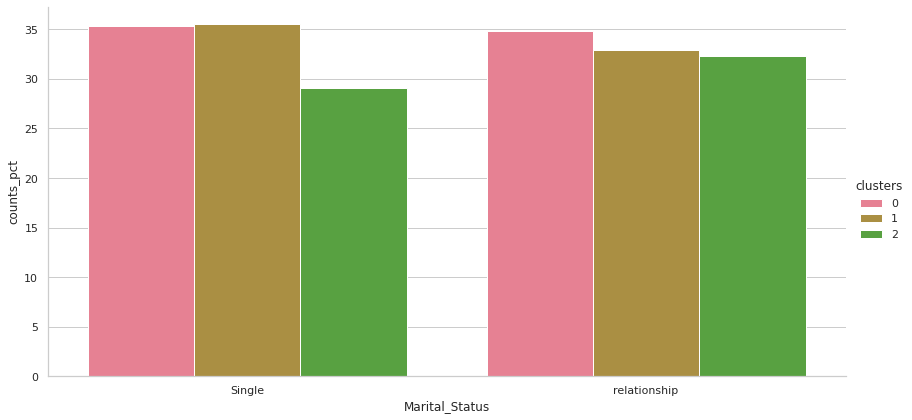

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

pivot = df.groupby(['Marital_Status', 'clusters']).size().reset_index(name='counts')
pivot['counts_pct'] = pivot.groupby(['Marital_Status'])['counts'].apply(lambda x: 100 * x / x.sum())


sns.set(style="whitegrid")
sns.set_palette("husl")
sns.catplot(x="Marital_Status", y="counts_pct", hue="clusters", kind="bar", data=pivot, height=6, aspect=2)

<Figure size 864x576 with 0 Axes>

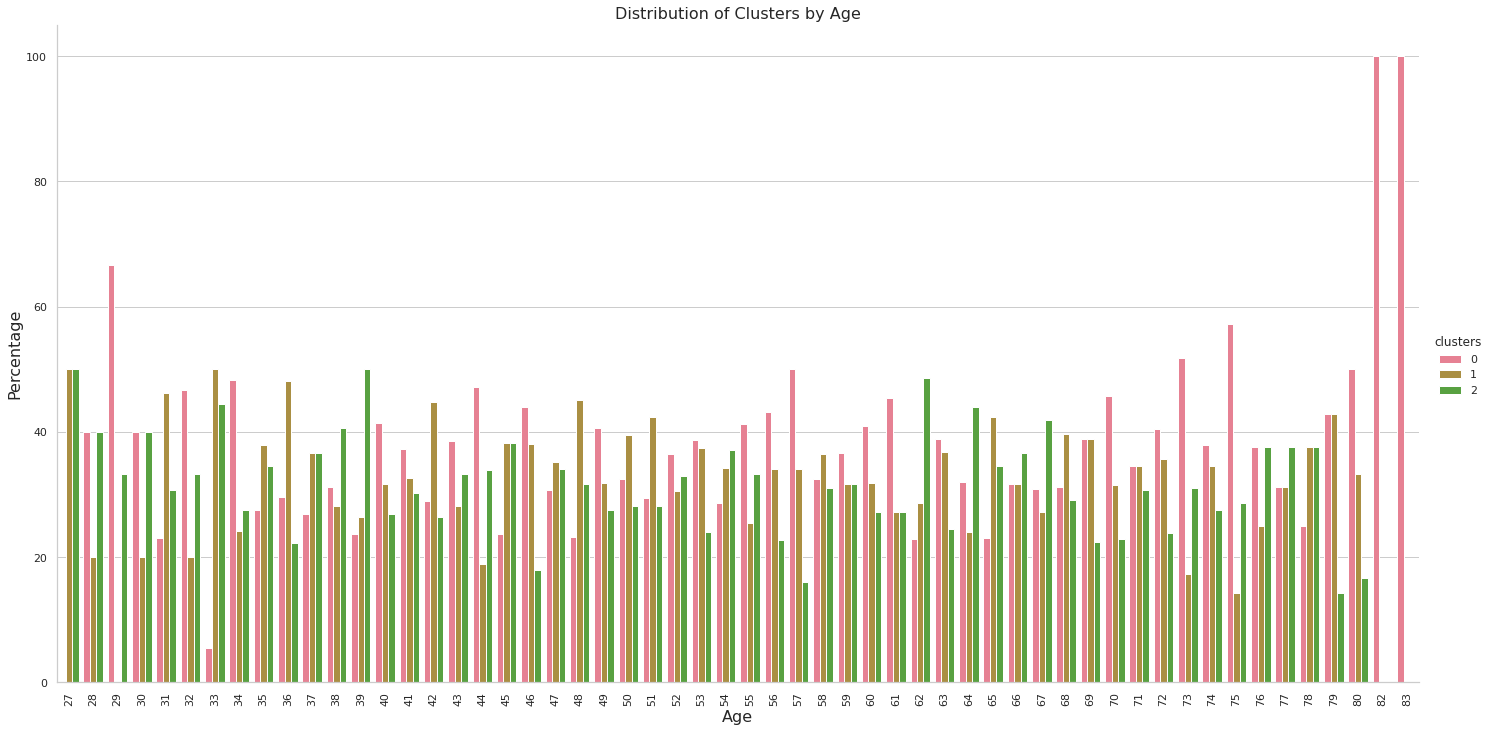

In [ ]:
plt.figure(figsize=(12, 8))
pivot = df.groupby(['Age', 'clusters']).size().reset_index(name='counts')
pivot['counts_pct'] = pivot.groupby(['Age'])['counts'].apply(lambda x: 100 * x / x.sum())


sns.set(style="whitegrid")
sns.set_palette("husl")
plot = sns.catplot(x="Age", y="counts_pct", hue="clusters", kind="bar", data=pivot, height=10, aspect=2)
plot.set_xticklabels(rotation=90)

plt.title('Distribution of Clusters by Age', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.show()

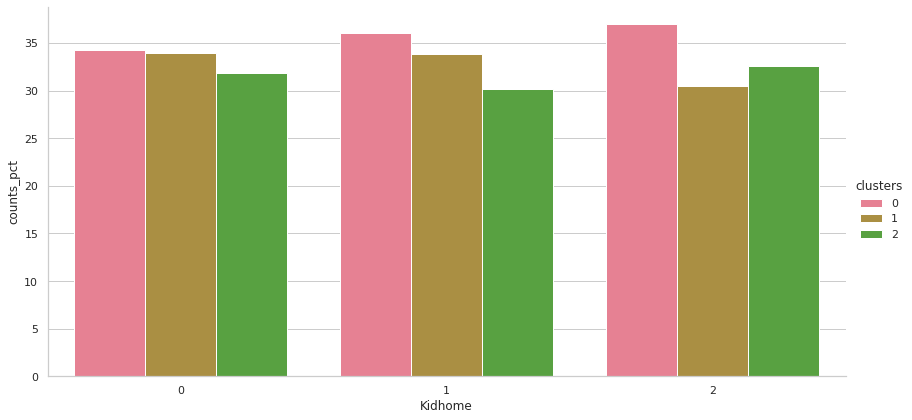

In [ ]:
pivot = df.groupby(['Kidhome', 'clusters']).size().reset_index(name='counts')
pivot['counts_pct'] = pivot.groupby(['Kidhome'])['counts'].apply(lambda x: 100 * x / x.sum())

sns.set(style="whitegrid")
sns.set_palette('husl')
sns.catplot(x="Kidhome", y="counts_pct", hue="clusters", kind="bar", data=pivot, height=6, aspect=2)

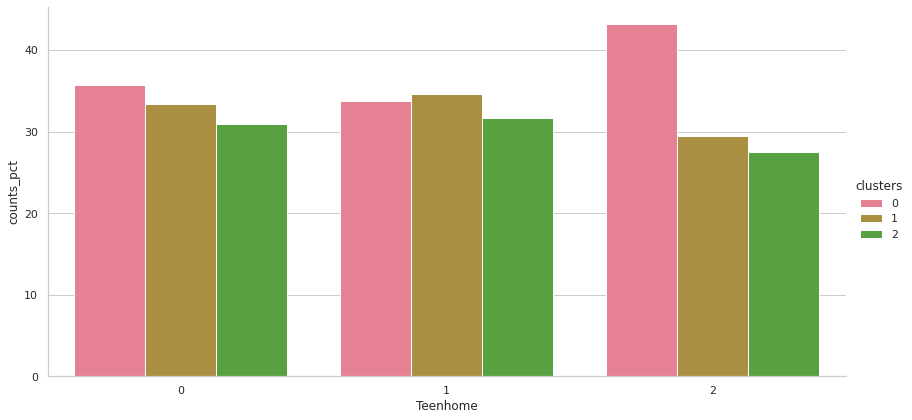

In [ ]:
pivot = df.groupby(['Teenhome', 'clusters']).size().reset_index(name='counts')
pivot['counts_pct'] = pivot.groupby(['Teenhome'])['counts'].apply(lambda x: 100 * x / x.sum())


sns.set(style="whitegrid")
sns.set_palette("husl")
sns.catplot(x="Teenhome", y="counts_pct", hue="clusters", kind="bar", data=pivot, height=6, aspect=2)

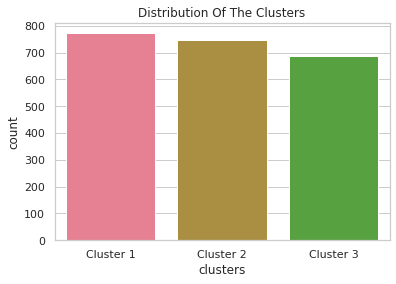

In [ ]:
df['clusters'] = df['clusters'].replace({0 : 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'})
pl = sns.countplot(x=df["clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

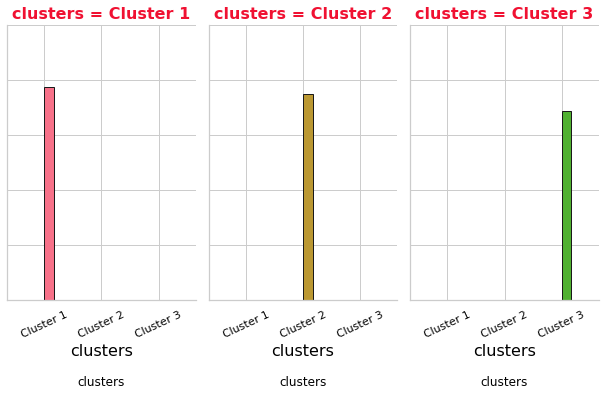

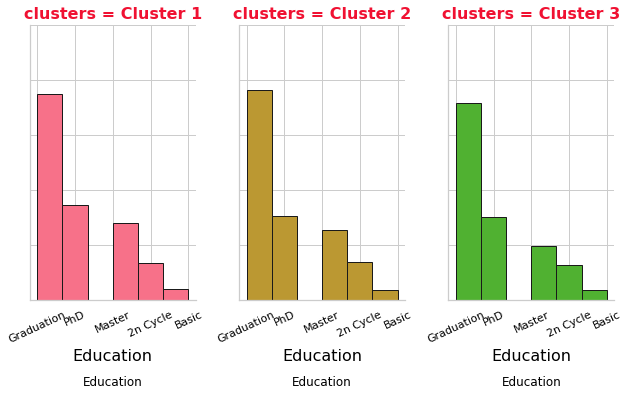

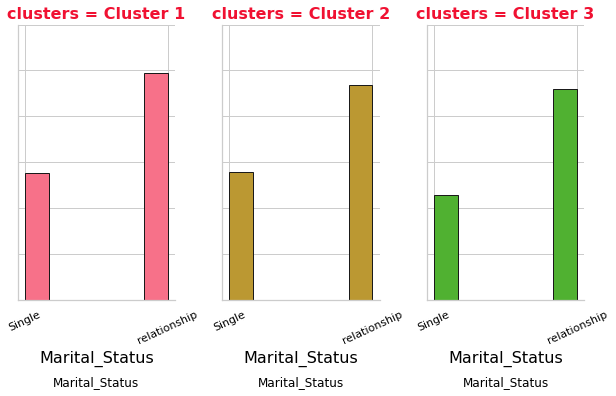

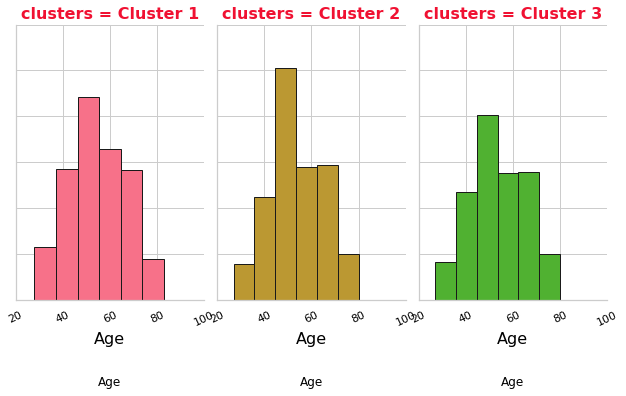

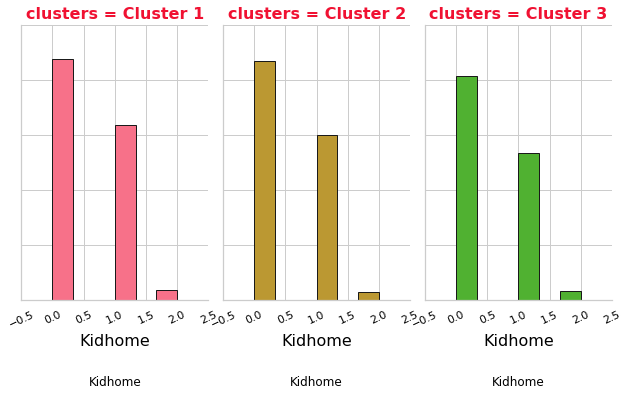

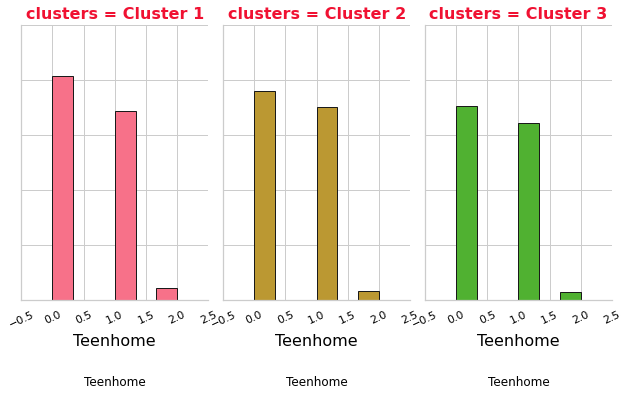

In [ ]:

df1 = df[['clusters' , 'Education', 'Marital_Status', 'Age', 'Kidhome', 'Teenhome']]

for i in df1:
    diag = sns.FacetGrid(df1, col = "clusters", hue = "clusters")
    diag.map(plt.hist, i, bins=6, ec ="k")
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=16, color = 'black')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

    for ax in diag.axes.flat:
        ax.text(0.5, -0.3, ax.get_xlabel(), ha='center', va='center', transform=ax.transAxes, color='black', fontsize=12)


მეტ–ნაკლებად თანაბრად განაწილდა კლასტერებში, თუმცა შეგვიძლია ვთქვათ,რომ შედარებით მაღალი მნიშვნელობა ვისაც აქვს Ageში ისინი მოხვდნენ მეორე კლასტერში.